## **Estimating the Stock Prediction Using machine Learning**

In [9]:
# Importing the necessary python libraries
import numpy as np
import pandas as pd
import sklearn
from easypreprocessing import EasyPreProcessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [11]:
#loading the Dataset into the the notebook enviornment
# 📥 Load Dataset
prep = EasyPreProcessing(r'../Dataset/train.csv') 
prep.info()


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

TypeError: 'NoneType' object is not callable

In [12]:
# Analyse the Missing Values
print("Categorical fields:", prep.categorical.fields)
print("Numerical fields:", prep.numerical.fields)
print("Missing values:\n", prep.missing_values)

Categorical fields: ['week']
Numerical fields: ['record_ID', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold']
Missing values:
 record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


In [13]:
# Impute Missing Values
prep.numerical.impute()

Numerical features imputated successfully.


In [14]:
# DataFrame Summary
print(prep.df.head())
print(prep.df.shape)

   record_ID      week  store_id    sku_id  total_price  base_price  \
0        1.0  17/01/11    8091.0  216418.0      99.0375    111.8625   
1        2.0  17/01/11    8091.0  216419.0      99.0375     99.0375   
2        3.0  17/01/11    8091.0  216425.0     133.9500    133.9500   
3        4.0  17/01/11    8091.0  216233.0     133.9500    133.9500   
4        5.0  17/01/11    8091.0  217390.0     141.0750    141.0750   

   is_featured_sku  is_display_sku  units_sold  
0              0.0             0.0        20.0  
1              0.0             0.0        28.0  
2              0.0             0.0        19.0  
3              0.0             0.0        44.0  
4              0.0             0.0        52.0  
(150150, 9)


In [15]:
# Create unique key & drop unnecessary columns
prep.dataset['key'] = prep.df['week'].astype(str) + '_' + prep.df['store_id'].astype(str)
prep.dataset = prep.df.drop(['record_ID', 'week', 'store_id', 'sku_id', 
                             'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)


In [17]:
# Group by key
prep.dataset = prep.df.groupby('key').sum()
print(prep.df.head())

                 units_sold
key                        
01/01/13_8023.0      2025.0
01/01/13_8058.0       682.0
01/01/13_8063.0       535.0
01/01/13_8091.0       210.0
01/01/13_8094.0       782.0


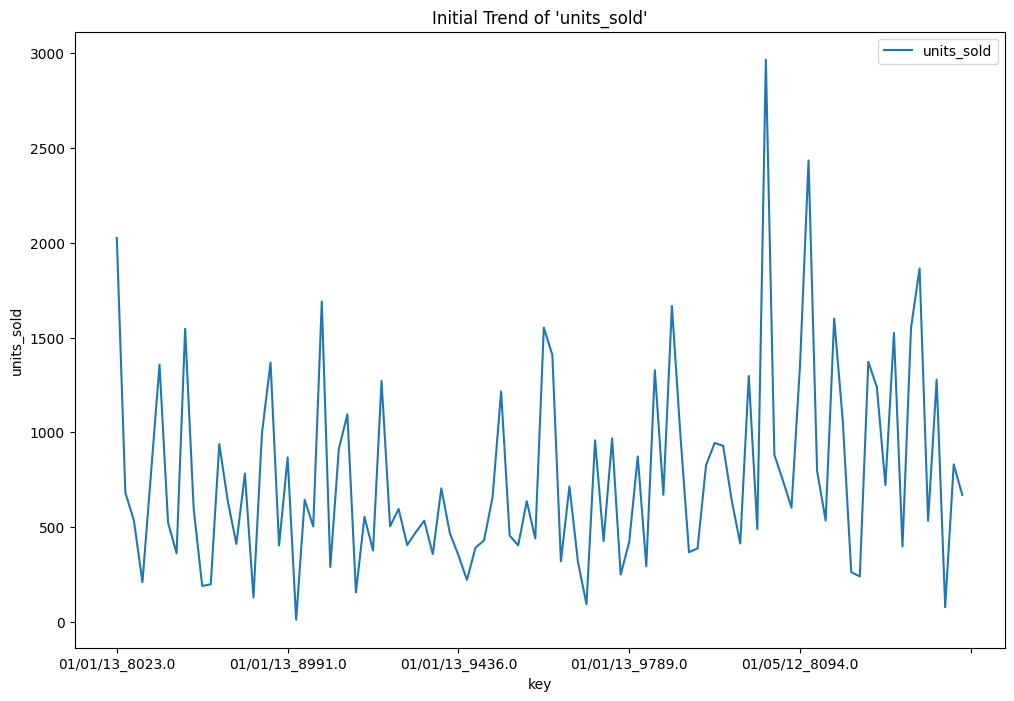

In [18]:
# Visualize Initial Trend
prep.df[:100].plot(figsize=(12, 8))
plt.title("Initial Trend of 'units_sold'")
plt.xlabel("key")
plt.ylabel("units_sold")
plt.show()

In [19]:
# Create Lag Features (day_1 to day_4)
prep.df['day_1'] = prep.df['units_sold'].shift(-1)
prep.df['day_2'] = prep.df['units_sold'].shift(-2)
prep.df['day_3'] = prep.df['units_sold'].shift(-3)
prep.df['day_4'] = prep.df['units_sold'].shift(-4)

In [20]:
# Remove NaN values
df = prep.df.dropna()

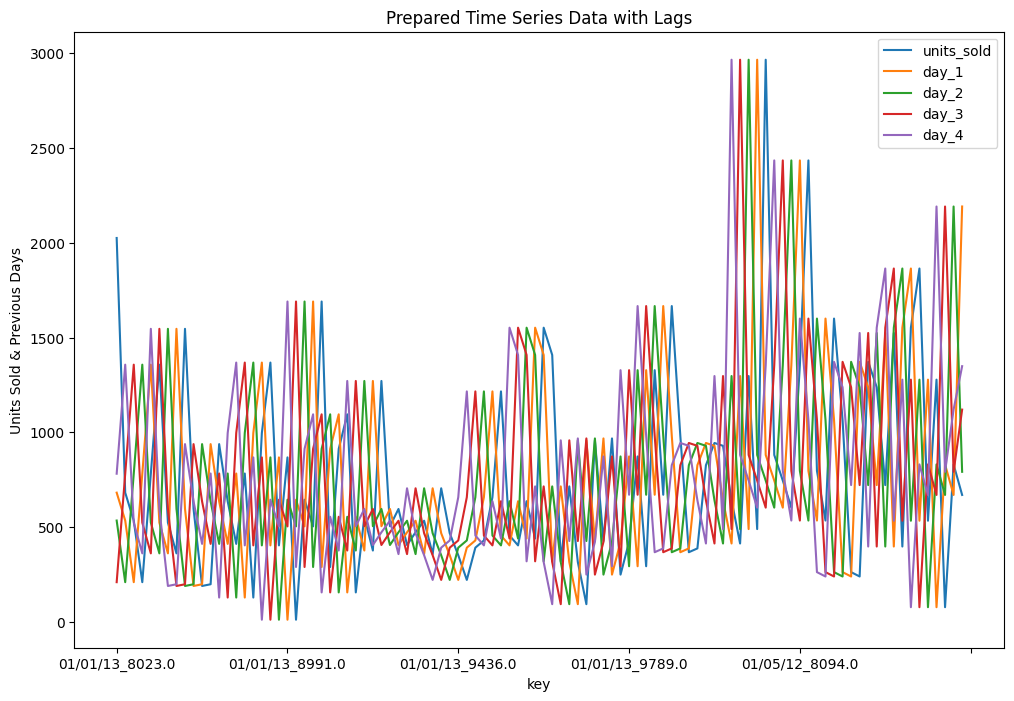

In [21]:
# Plot Final Prepared Data
df[:100].plot(figsize=(12, 8))
plt.title("Prepared Time Series Data with Lags")
plt.xlabel("key")
plt.ylabel("Units Sold & Previous Days")
plt.show()

In [23]:
# Final X, y preparation for model
x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
x3 = x3.reshape(-1, 1)
x4 = x4.reshape(-1, 1)
y = y.reshape(-1, 1)
X = np.concatenate((x1, x2, x3, x4), axis=1)

In [24]:
# Train-Test Split (85% train, 15% test)
split_percentage = 15
test_split = int(len(df) * (split_percentage / 100))
X_train, X_test = X[:-test_split], X[-test_split:]
y_train, y_test = y[:-test_split], y[-test_split:]

print("Train X:", X_train.shape)
print("Test X:", X_test.shape)
print("Train y:", y_train.shape)
print("Test y:", y_test.shape)

Train X: (8395, 4)
Test X: (1481, 4)
Train y: (8395, 1)
Test y: (1481, 1)


### **Model Building**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle
import numpy as np

### Linear Regression

In [26]:
def linear_model(X_train, y_train, X_test, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("Linear Regression R² Score:", r2_score(y_test, y_pred))
    return lr, y_pred

### Decision Tree

In [27]:
def decision_tree_model(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print("Decision Tree R² Score:", r2_score(y_test, y_pred))
    return dt, y_pred

### Random Forest Classifier

In [28]:
def random_forest_model(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train.ravel())  # suppress warning by flattening
    y_pred = rf.predict(X_test)
    print("Random Forest R² Score:", r2_score(y_test, y_pred))
    return rf, y_pred


### XGBoost 

In [29]:
def xgboost_model(X_train, y_train, X_test, y_test):
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train.ravel())
    y_pred = xgb.predict(X_test)
    print("XGBoost R² Score:", r2_score(y_test, y_pred))
    return xgb, y_pred

### Randomised search Cross Validation for getting the best hyperparameters

In [30]:
def random_forest_tuned(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor()
    param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
    rf_random.fit(X_train, y_train.ravel())
    best_model = rf_random.best_estimator_
    y_pred = best_model.predict(X_test)
    print("Tuned Random Forest R² Score:", r2_score(y_test, y_pred))
    return best_model, y_pred

### Visualising the data

In [31]:
def plot_predictions(y_test, y_pred, title="Model Predictions"):
    plt.rcParams["figure.figsize"] = (12, 8)
    plt.plot(y_pred[:100], label='Predictions')
    plt.plot(y_test[:100], label='Actual Sales')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

## **Model Training and Parameter Testing**

Linear Regression R² Score: -0.0042980340179701315


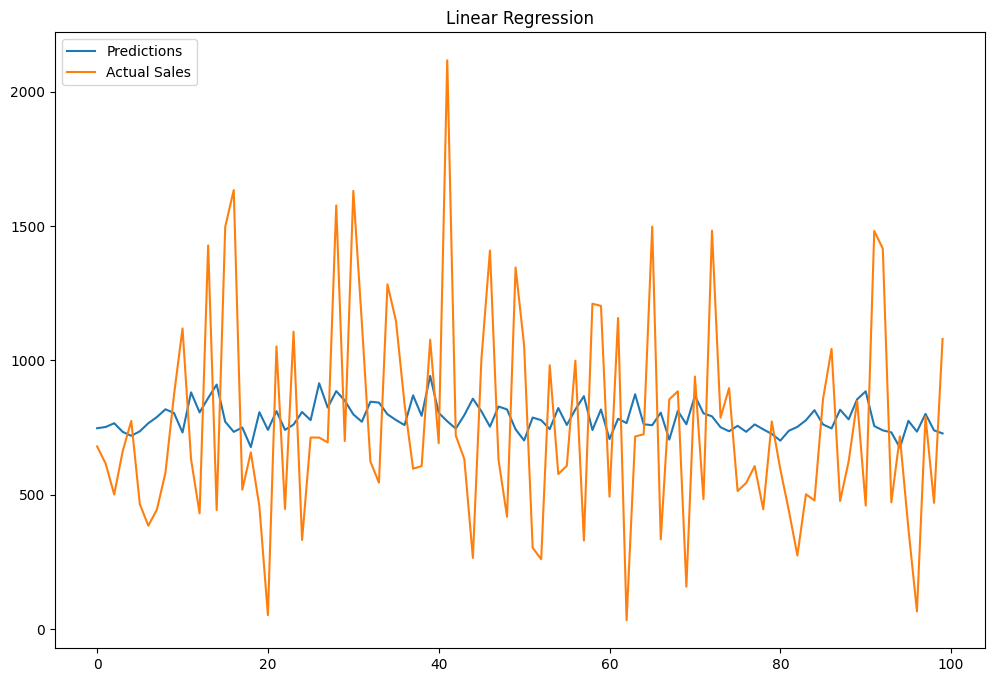

In [32]:
# Linear Regression
lr_model, lr_pred = linear_model(X_train, y_train, X_test, y_test)
plot_predictions(y_test, lr_pred, "Linear Regression")

Decision Tree R² Score: 0.37669420988309577


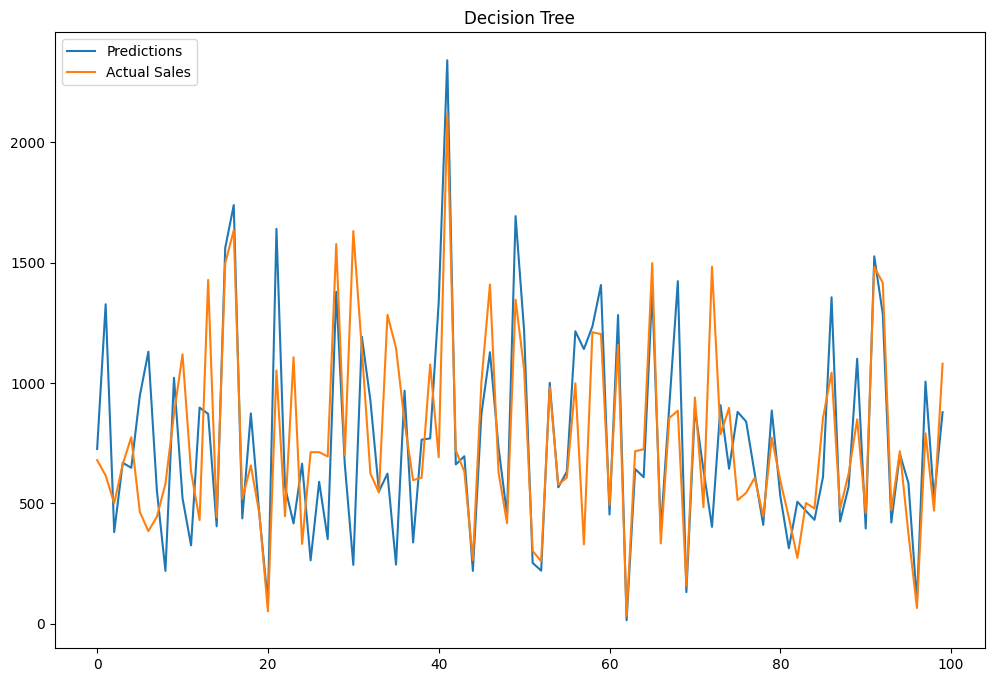

In [33]:
# Decision Tree
dt_model, dt_pred = decision_tree_model(X_train, y_train, X_test, y_test)
plot_predictions(y_test, dt_pred, "Decision Tree")

Random Forest R² Score: 0.6918051299649841


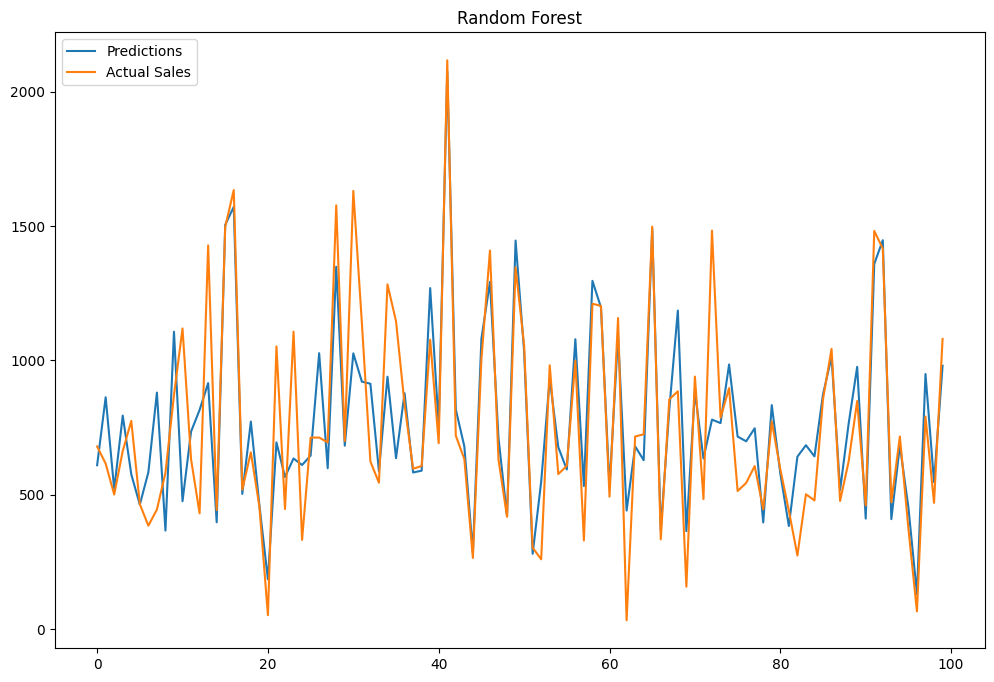

In [34]:
# Random Forest
rf_model, rf_pred = random_forest_model(X_train, y_train, X_test, y_test)
plot_predictions(y_test, rf_pred, "Random Forest")

XGBoost R² Score: 0.5962779753990961


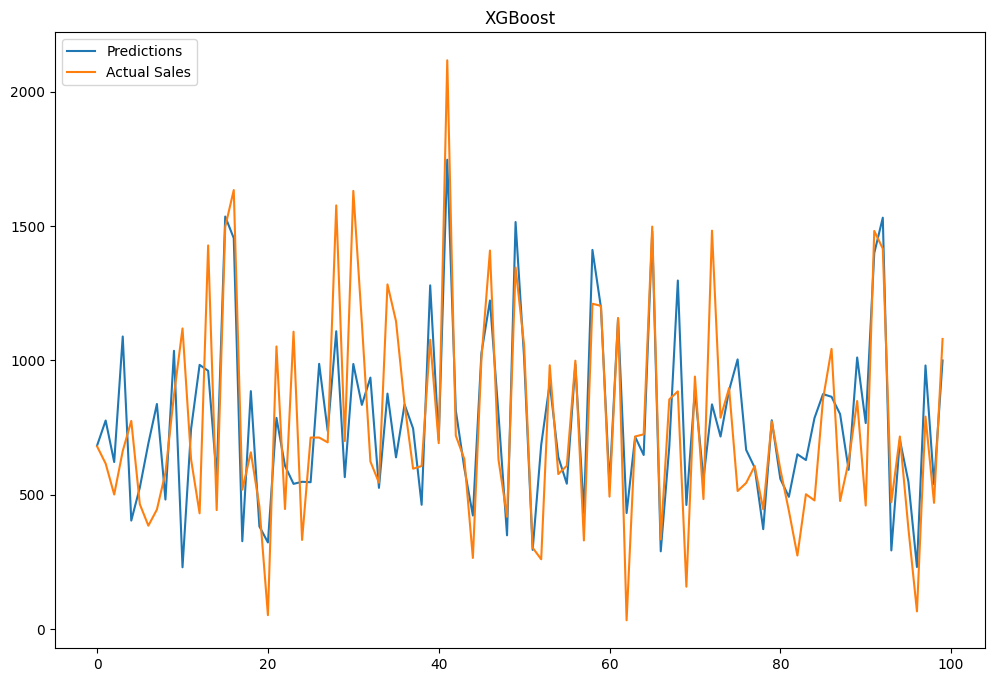

In [35]:
# XGBoost
xgb_model, xgb_pred = xgboost_model(X_train, y_train, X_test, y_test)
plot_predictions(y_test, xgb_pred, "XGBoost")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Random Forest R² Score: 0.6774022546804284


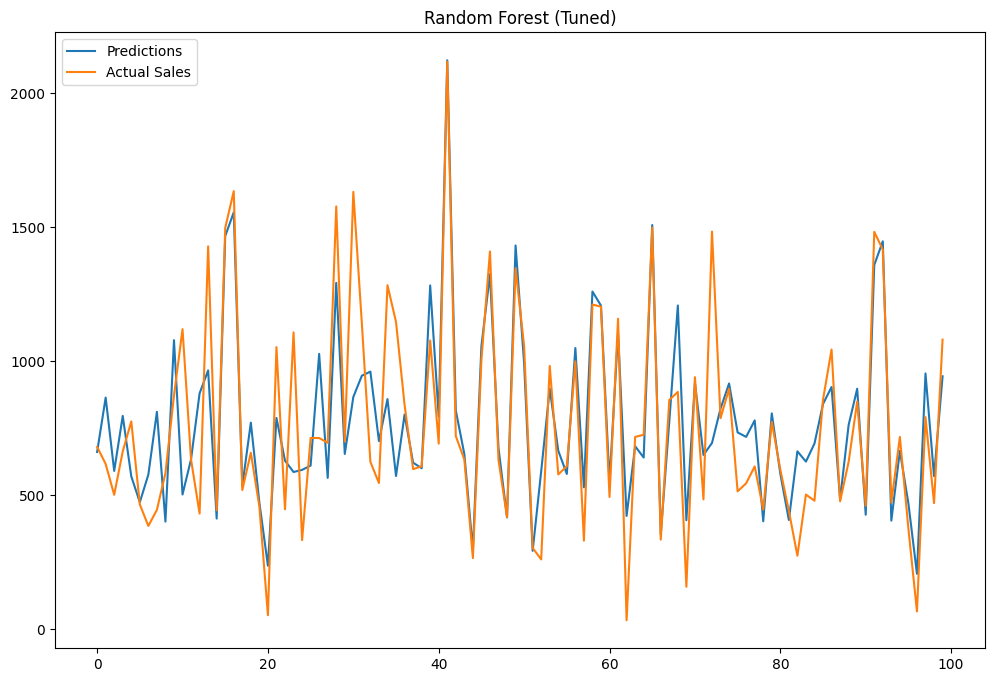

In [36]:
# Random Forest with Randomized Search CV
best_rf_model, best_rf_pred = random_forest_tuned(X_train, y_train, X_test, y_test)
plot_predictions(y_test, best_rf_pred, "Random Forest (Tuned)")

In [37]:
# === Save Final Model ===
pickle.dump(best_rf_model, open('sales_demand_forecasting.pkl', 'wb'))

In [38]:
#Test Prediction jff
features = np.array([[682.0, 535.0, 210.0, 782.0]])
print("Predicted Sales:", best_rf_model.predict(features))

Predicted Sales: [1960.89294391]
